In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd


data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["MedHouseValue"] = data.target

X = df.drop("MedHouseValue", axis=1)
y = df["MedHouseValue"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(0.5332001304956553, np.float64(0.7455813830127764), 0.5757877060324508)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, auc
)
import matplotlib.pyplot as plt

df = pd.read_csv("titanic_cleaned.csv")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    int64  
 5   Age                891 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    int64  
 9   Fare               891 non-null    float64
 10  Cabin              891 non-null    int64  
 11  Embarked           891 non-null    int64  
 12  Familysize         891 non-null    int64  
 13  isalone            891 non-null    int64  
 14  Title              891 non-null    object 
 15  AgeGroup           891 non-null    object 
 16  Age_scaled         891 non

In [8]:
df=df.drop('Name',axis=1)
df=df.drop('Title',axis=1)

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['AgeGroup']=le.fit_transform(df['AgeGroup'])


In [12]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cm, acc, prec, rec, f1


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(array([[92, 13],
        [20, 54]]),
 0.8156424581005587,
 0.8059701492537313,
 0.7297297297297297,
 0.7659574468085106)

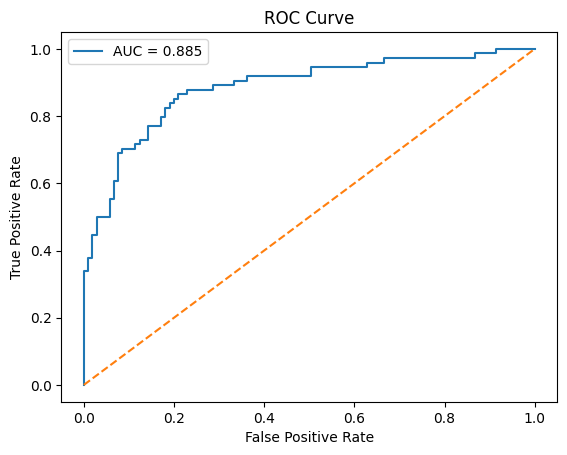

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [14]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


rf = RandomForestRegressor(n_estimators=300, max_depth=12, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)


xgb = XGBRegressor(
    n_estimators=300, max_depth=6, learning_rate=0.1,
    subsample=0.8, colsample_bytree=0.8, random_state=42
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)


lr_results = [rmse, r2]

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "RMSE": [rmse, rf_rmse, xgb_rmse],
    "R2":   [r2,   rf_r2,   xgb_r2]
})

results


,Model,RMSE,R2
0,Linear Regression,0.745581,0.575788
1,Random Forest,0.369486,0.437035
2,XGBoost,0.389068,0.375781
